In [4]:
!python -m pip install -U matplotlib
!python -m pip install -U numpy
!python -m pip install -U opencv-python
!python -m pip install -U scikit-image

  Using cached scikit_image-0.22.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
  Using cached scipy-1.11.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached tifffile-2023.9.26-py3-none-any.whl.metadata (30 kB)
  Using cached lazy_loader-0.3-py3-none-any.whl.metadata (4.3 kB)
Using cached scikit_image-0.22.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (14.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.3/313.3 kB 1.6 MB/s eta 0:00:00a 0:00:01m
Using cached lazy_loader-0.3-py3-none-any.whl (9.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.6 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 11.2 MB/s eta 0:00:0000:0100:01
Using cached scipy-1.11.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36.4 MB)
Using cached tifffile-2023.9.26-py3-none-any.whl (222 kB)
  Attempting uninstall: pillow
    Found existing installation: Pillow 10.1.0

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
#from skimage.color import rgb2gray, gray2rgb

# A escolha dos parâmetros ideais depende do tipo de transformação que você deseja aplicar à imagem e dos efeitos visuais específicos que procura.

1. **Para a função `alargamento_contraste`**:
   - `k`: Experimente valores como 1.5, 2.0, ou 3.0 para ajustar a intensidade da transformação.
   - `E`: Experimente valores como 0.5, 1.0, ou 2.0 para controlar a forma da transformação.

2. **Para a função `negativo`**:
   - Não há parâmetros adicionais para ajustar nesta função.

3. **Para a função `logaritmo`**:
   - `c`: Experimente valores como 1, 2, ou 3 para ajustar a intensidade da transformação logarítmica.

4. **Para a função `transformacao_potencia`**:
   - `c`: Experimente valores como 1, 2, ou 3 para ajustar a intensidade da transformação de potência.
   - `gamma`: Experimente valores como 0.5, 1.0, ou 1.5 para controlar a forma da transformação de potência.


# Alargamento de Contraste

## s=T ( r )=1 / ( 1+ ( k /r )**E ).

In [22]:
def alargamento_contraste(nome_imagem:str, k:float = 1, E:float = 1)->np.ndarray:
    """
    Realiza o Alargamento de contraste de uma imagem
    
    Parâmetros:
        nome_imagem::str: Nome da imagem que será lida e processada
        k::float: controla a intensidade da transformação. Quanto maior o valor de k, mais intensa será a transformação, onde k afeta a amplitude da função de transformação.Se k for pequeno, a transformação terá um efeito mais suave.
        E::float: Expoente controla a forma da transformação. Se E for um valor baixo, a transformação será mais linear. Se E for um valor mais alto, a transformação será menos linear. Valores de E maiores resultam em uma transformação mais agressiva nos extremos dos valores de pixel, enquanto valores menores de E proporcionam uma transformação mais suave.
        
    Retorno:
        imagem_transformada::numpy.ndarray: Imagem transformada pelo apargamento de contraste
    """
    
    imagem = imread(nome_imagem)
    # Adiciona uma constante pequena para evitar log(0) e/ou divisão por zero
    epsilon = 1e-8
    
    # Aplica a transformação de alargamento de contraste
    imagem_transformada = 1 / (1 + (k / (imagem+epsilon))**E)
    
    # Garante que os valores estejam no intervalo [0, 1] (apenas int, nada de float) 
    imagem_transformada = np.clip(imagem_transformada, 0, 255)#.astype(np.uint8)
    
    return imagem_transformada



# Negativo 

## s= L−1 −r .

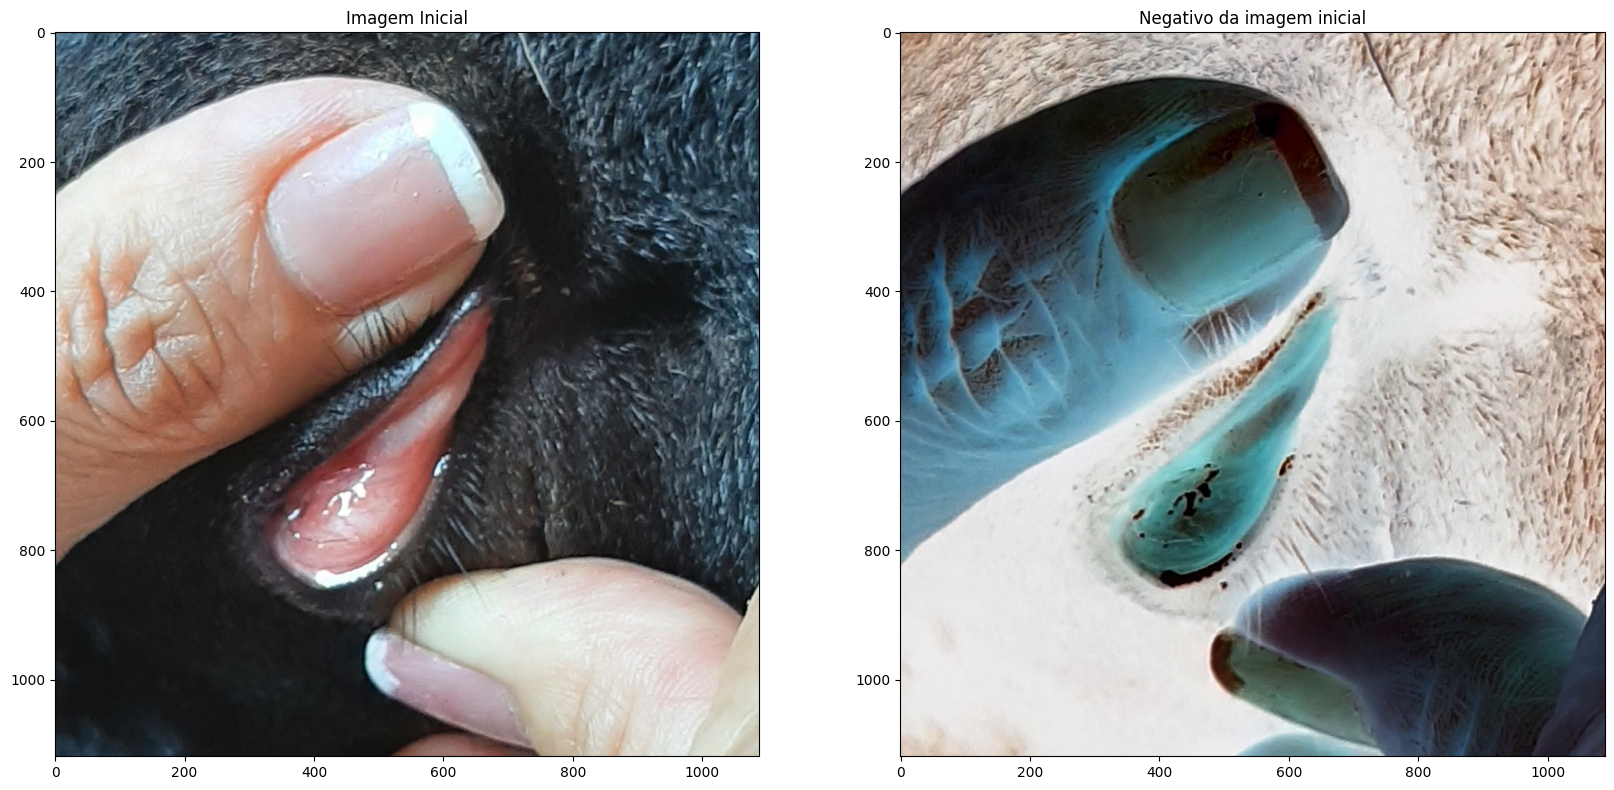

In [45]:
def negativo(nome_imagem:str)->np.ndarray:
    """
    Transforma uma imagem para sua versão negativa
    
    Parâmetros:
        img::string: Nome de uma imagem
        
    Retorno:
        neg::np.array: Imagem negativada 
        
    """
    imagem = imread(nome_imagem)
    """
    realiza a inversão do valor e o converte para seu valor inveso absoluto (ignora o sina);
    """
    neg = abs(255-imagem)
    
    return neg

# Exibe a imagem 
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(imread("dados/2023-09-13&1105_2.jpg"), cmap="gray")
ax[0].set_title("Imagem Inicial")
ax[1].imshow(negativo("dados/2023-09-13&1105_2.jpg"))
ax[1].set_title('Negativo da imagem inicial');


# Logarítmo

## s=clog ( 1+r ).

c = 1 (Valor Padrão):

Se c for 1, a transformação logarítmica é aplicada sem qualquer amplificação ou redução. O resultado é proporcional à função logarítmica padrão.
c > 1:

Se c for maior que 1, a transformação logarítmica será amplificada. Isso significa que a diferença entre os valores dos pixels na imagem resultante será maior, resultando em uma ampliação da gama dinâmica.
0 < c < 1:

Se c estiver no intervalo de 0 a 1, a transformação logarítmica será reduzida. Isso terá o efeito de diminuir a diferença entre os valores dos pixels na imagem resultante, resultando em uma redução da gama dinâmica.
c < 0:

Se c for negativo, a transformação logarítmica será aplicada, e os valores dos pixels serão invertidos em relação à função logarítmica padrão.

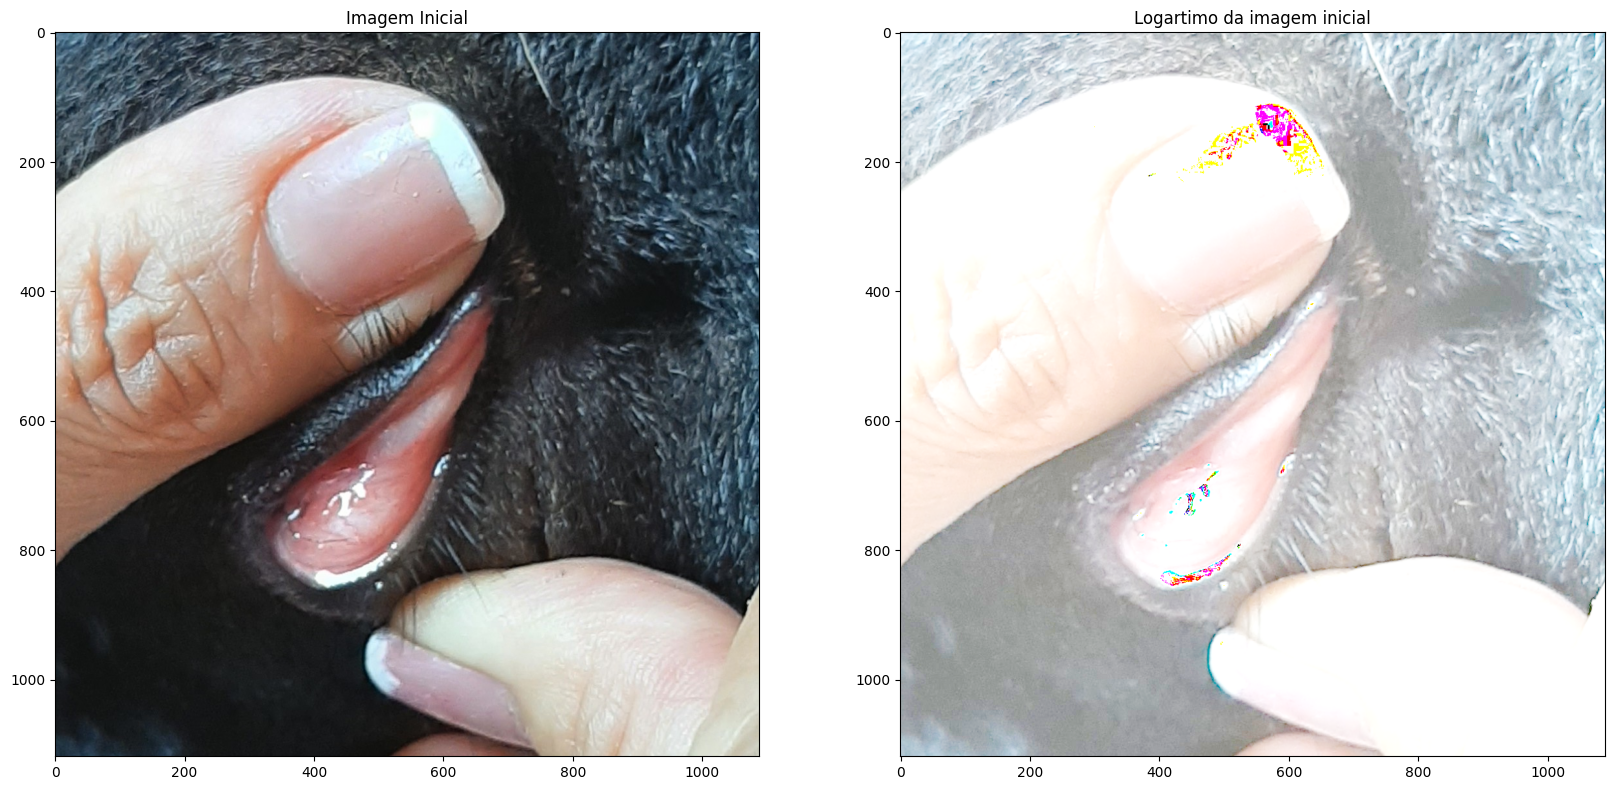

In [25]:
def logaritmo(nome_imagem:str, c:float=1)->np.ndarray:
    """
    Calcula a transformação de intensidade logarítma da imagem
    
    Parâmetros:
        nome_imagem::str: Nome da imagem que será transformada
        c::float: coeficiente que multiplica o resultado da transformação logarítmica
    Retorno:
        logaritmico_img::np.ndarray: Imagem gerada apartir do calculo do logartimo 
    """
    img = imread(nome_imagem)
    
    # Adiciona uma constante pequena para evitar log(0)
    epsilon = 1e-8
    
    # Aplica a transformação logarítmica para cada canal RGB
    logaritmico_img = c * np.log(1 + img + epsilon)
    
    # Garante que os valores estejam no intervalo [0, 255] e que sejam inteiros
    logaritmico_img = np.clip(logaritmico_img, 0, 255).astype(np.uint8)
    
    return logaritmico_img

# Exibe a imagem 

c = 50.2

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(imread("dados/2023-09-13&1105_2.jpg"), cmap="gray")
ax[0].set_title("Imagem Inicial")
ax[1].imshow(logaritmo("dados/2023-09-13&1105_2.jpg",c))
ax[1].set_title('Logartimo da imagem inicial');


# Potência

## s=c r ** γ .

Se c for igual a 1, a transformação de potência será aplicada sem amplificação ou redução significativa. Valores de c maiores que 1 amplificam a transformação, enquanto valores de c entre 0 e 1 reduzem a amplitude da transformação.


γ controla a forma da curva de transformação de potência. Um valor de gamma maior que 1 resulta em uma compressão da gama dinâmica, realçando os tons escuros e atenuando os tons claros. Um valor de gamma entre 0 e 1 expande a gama dinâmica, realçando os tons claros e atenuando os tons escuros.

In [ ]:
def transformacao_potencia(nome_imagem:str, c:float=1.0, gamma:float=1.0)->np.ndarray:
    """
    Calcula a transformação de pontencia de uma imagem e gera uma nova imagem com base nisso
    
    Parâmetros:
        nome_imagem::str: Nome da imagem que será transformada
        c::float: coeficiente que multiplica o resultado da transformação de potência. Ele ajusta a amplitude ou intensidade da transformação.
        gamma::float: controla a forma da curva da transformação de potência.
    """
    imagem = imread(nome_imagem)
    
    # Aplica a transformação de potência
    imagem_transformada = c * np.power(imagem, gamma)
    
    # Garante que os valores estejam no intervalo [0, 255]
    imagem_transformada = np.clip(imagem_transformada, 0, 255).astype(np.uint8)
    
    return imagem_transformada